In [1]:
#“What time of day is one most likely to get into an accident in NYC?” "What day of the week are there the most accidents" "When are the most motorists killed" "Number killed and long/lat"
#1.  Filter for time year/time of day, get rid of missing values
#2. Create ranges, use the buckets or iloc/loc
#3. Put into a dataframe- It's already a dataframe.
#4. Filter it to show which range has the most crashes

In [2]:
import pandas as pd


In [3]:
csv_path = "Q3_Resources/Motor_Vehicle_Collisions_-_Crashes.csv"
df = pd.read_csv(csv_path)
df.head()
print(df.shape)

C:\Users\clayt\AppData\Local\Temp\ipykernel_20048\2395576938.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


(2033266, 29)


In [4]:
#Filter data down to relevant columns
#Alex(TA) helped with this code
crash_date_and_time = df[["CRASH DATE","CRASH TIME"]]
crash_date_and_time

,CRASH DATE,CRASH TIME
0,09/11/2021,2:39
1,03/26/2022,11:45
2,06/29/2022,6:55
3,09/11/2021,9:35
4,12/14/2021,8:13
...,...,...
2033261,09/19/2023,15:55
2033262,09/14/2023,23:15
2033263,09/12/2023,16:00
2033264,09/19/2023,10:45


In [5]:
#Drop rows with missing values (NaN)
crash_date_and_time = crash_date_and_time.dropna()


In [6]:
#Do a count to see how many there are now
crash_date_and_time.count()

CRASH DATE    2033266
CRASH TIME    2033266
dtype: int64

In [7]:
#Create bins for the time of day
#bins = [0:00, 1:00, 2:00, 3:00, 4:00, 5:00, 6:00, 7:00, 8:00, 9:00, 10:00, 
        #11:00, 12:00, 13:00, 14:00, 15:00, 16:00, 17:00, 18:00, 19:00, 20:00, 21:00, 22:00, 23:00 ]
#group_names = ["12am", "1am", "2am", "3am", "4am", "5am", "6am", "7am", "8am", "9am", "10am", 
               #"11am", "12pm" , "1pm", "2pm", "3pm", "4pm", "5pm", "6pm", "7pm", "8pm", "9pm", "10pm", "11pm"]
labels = [str(i)+':00-'+str(i)+':59' for i in range(24)]
bins = list(range(25))    
crash_date_and_time["CRASH TIME"] = pd.to_datetime(crash_date_and_time["CRASH TIME"], format= "%H:%M")
pd.cut(crash_date_and_time["CRASH TIME"].dt.hour,bins,labels=labels, right=False, include_lowest=True)



0            2:00-2:59
1          11:00-11:59
2            6:00-6:59
3            9:00-9:59
4            8:00-8:59
              ...     
2033261    15:00-15:59
2033262    23:00-23:59
2033263    16:00-16:59
2033264    10:00-10:59
2033265    15:00-15:59
Name: CRASH TIME, Length: 2033266, dtype: category
Categories (24, object): ['0:00-0:59' < '1:00-1:59' < '2:00-2:59' < '3:00-3:59' ... '20:00-20:59' < '21:00-21:59' < '22:00-22:59' < '23:00-23:59']

In [8]:
#Which bin has the most crashes?
#Attaches a bin to each crash via the new column.

crash_date_and_time["bins"] = pd.cut(crash_date_and_time["CRASH TIME"].dt.hour,bins,labels=labels, right= False, include_lowest=True)
crash_date_and_time[["bins", "CRASH TIME"]]


,bins,CRASH TIME
0,2:00-2:59,1900-01-01 02:39:00
1,11:00-11:59,1900-01-01 11:45:00
2,6:00-6:59,1900-01-01 06:55:00
3,9:00-9:59,1900-01-01 09:35:00
4,8:00-8:59,1900-01-01 08:13:00
...,...,...
2033261,15:00-15:59,1900-01-01 15:55:00
2033262,23:00-23:59,1900-01-01 23:15:00
2033263,16:00-16:59,1900-01-01 16:00:00
2033264,10:00-10:59,1900-01-01 10:45:00


In [12]:
# Count the number of crashes in each bin
crash_counts = crash_date_and_time["bins"].value_counts().sort_index()
crash_counts


bins
0:00-0:59       65007
1:00-1:59       34976
2:00-2:59       26795
3:00-3:59       23520
4:00-4:59       26644
5:00-5:59       28962
6:00-6:59       45044
7:00-7:59       61542
8:00-8:59      111664
9:00-9:59      107994
10:00-10:59    100877
11:00-11:59    105244
12:00-12:59    111911
13:00-13:59    117609
14:00-14:59    135865
15:00-15:59    127316
16:00-16:59    146828
17:00-17:59    143588
18:00-18:59    126218
19:00-19:59    103367
20:00-20:59     86347
21:00-21:59     73203
22:00-22:59     66730
23:00-23:59     56015
Name: count, dtype: int64

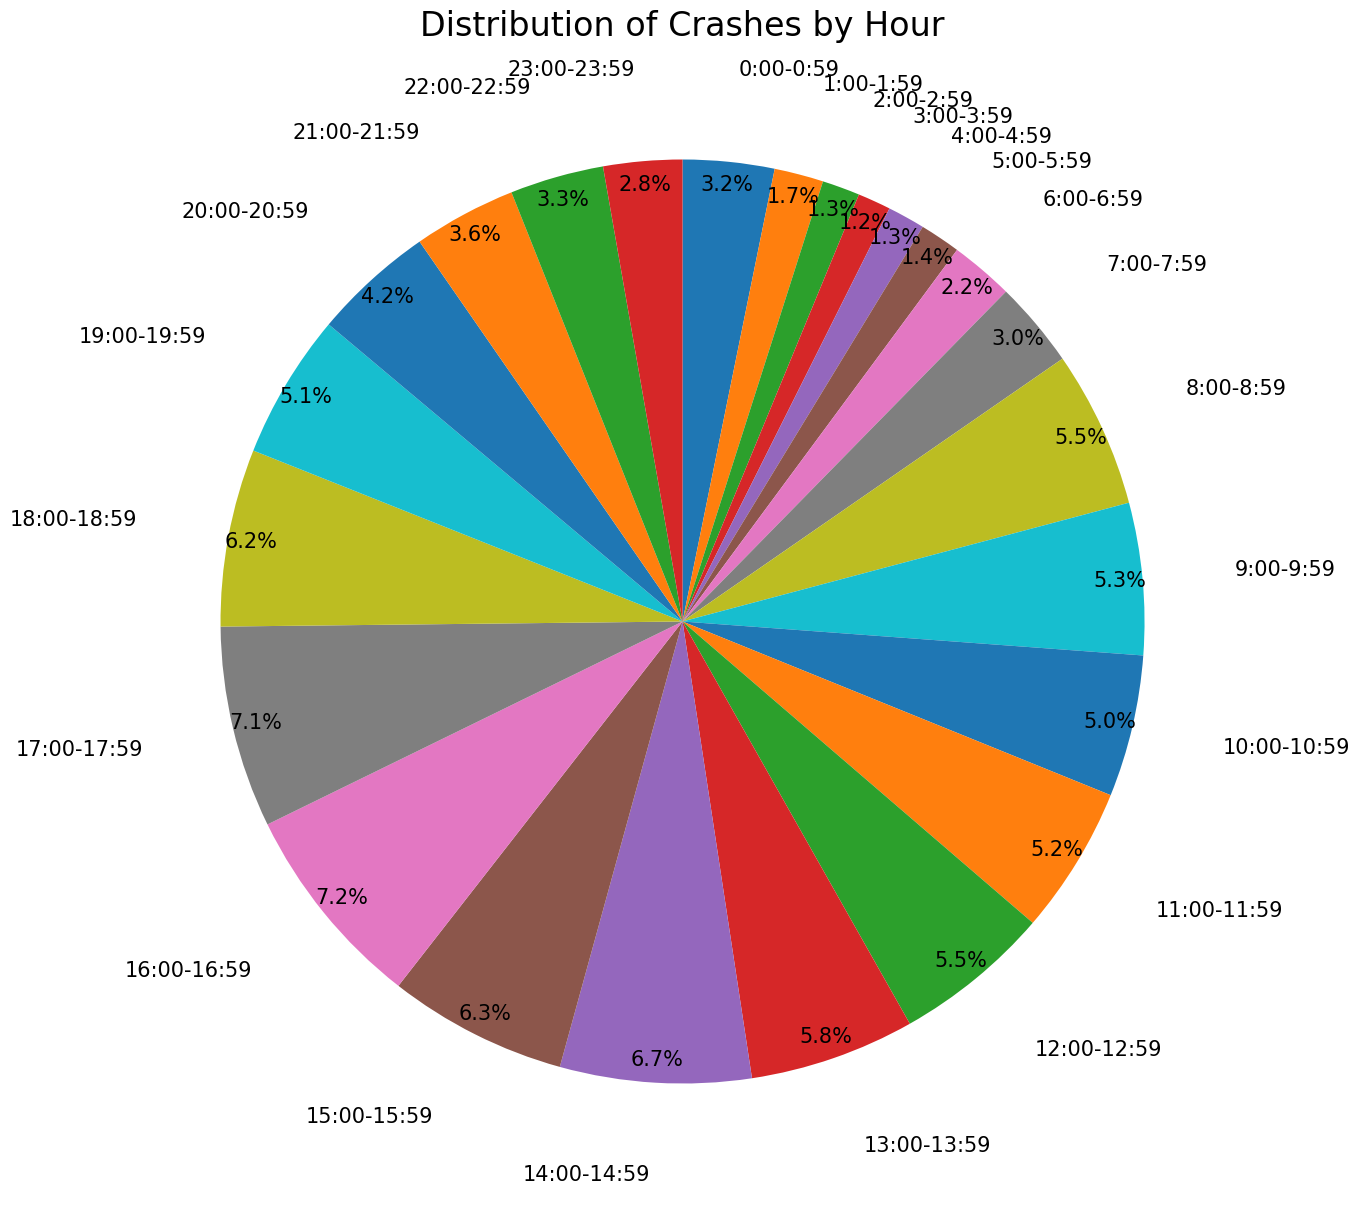

In [59]:
import matplotlib.pyplot as plt

# Create a pie chart


plt.figure(figsize=(15, 15))  
plt.pie(crash_counts, labels=crash_counts.index, autopct='%1.1f%%', 
startangle=90, counterclock=False, labeldistance=1.2,pctdistance=.95,radius=1, textprops = {'fontsize': 15})

# Set a title
plt.title('Distribution of Crashes by Hour', fontsize = 24)

# Show the pie chart
plt.show()

In [71]:
import numpy as np
from scipy import stats


# Filter and process the data
crash_date_and_time = df[["CRASH DATE", "CRASH TIME"]]
crash_date_and_time["CRASH TIME"] = pd.to_datetime(crash_date_and_time["CRASH TIME"], format="%H:%M")

# Extract the hour of the day
crash_date_and_time["hour"] = crash_date_and_time["CRASH TIME"].dt.hour

# Count the number of crashes in each hour
crash_counts = crash_date_and_time["hour"].value_counts()

# Calculate mean, median, and mode
mean_value = np.mean(crash_counts)
median_value = np.median(crash_counts)
mode_result = stats.mode(crash_counts)
mode_value = crash_counts.idxmax()

# Display summary statistics
print("Mean:", mean_value)
print("Median:", median_value)
print("Mode:", mode_value)

Mean: 84719.41666666667
Median: 93612.0
Mode: 16


C:\Users\clayt\AppData\Local\Temp\ipykernel_20048\579146145.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_date_and_time["CRASH TIME"] = pd.to_datetime(crash_date_and_time["CRASH TIME"], format="%H:%M")
C:\Users\clayt\AppData\Local\Temp\ipykernel_20048\579146145.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_date_and_time["hour"] = crash_date_and_time["CRASH TIME"].dt.hour


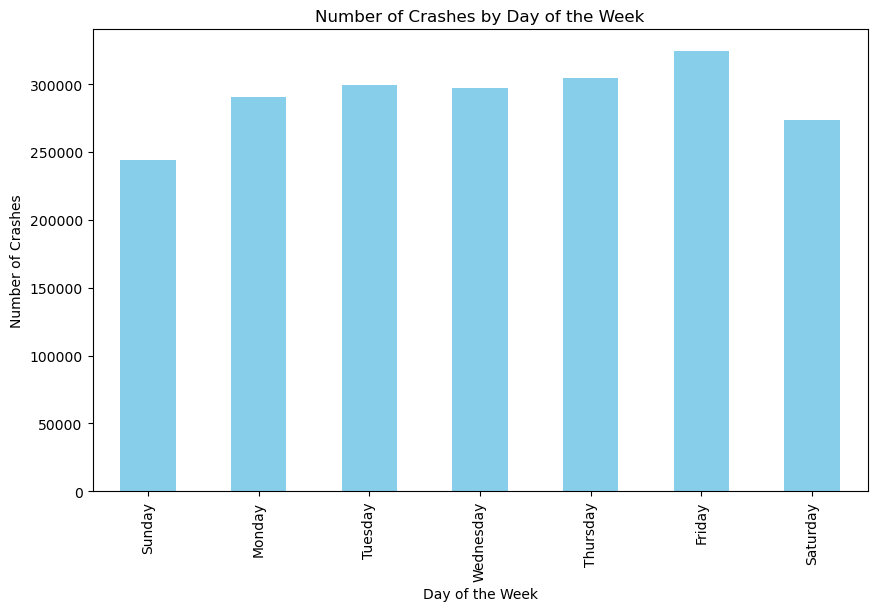

In [81]:
crash_date_and_time["CRASH DATE"] = pd.to_datetime(crash_date_and_time["CRASH DATE"])
crash_date_and_time["Day of Week"] = crash_date_and_time["CRASH DATE"].dt.day_name()

# Count the number of crashes for each day of the week
crash_counts = crash_date_and_time["Day of Week"].value_counts()

# Define the order of days of the week for sorting
days_of_week_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
crash_counts.loc[days_of_week_order].plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.title('Number of Crashes by Day of the Week')

# Show the bar chart
plt.show()



In [83]:
crash_counts = crash_date_and_time["Day of Week"].value_counts()
crash_counts


Day of Week
Friday       324113
Thursday     304141
Tuesday      299632
Wednesday    297402
Monday       290471
Saturday     273769
Sunday       243738
Name: count, dtype: int64

In [84]:
324113 - 304141

19972